# 需要保存的部分代码

In [ ]:
### 加载检查点，恢复之前的训练进度 ###
# 需要设置 config 中的 ckpt_iter = 'max'

# load checkpoint
if ckpt_iter == 'max':
    ckpt_iter = find_max_epoch(output_directory)
if ckpt_iter >= 0:
    try:
        # load checkpoint file
        model_path = os.path.join(output_directory, '{}.pkl'.format(ckpt_iter))
        checkpoint = torch.load(model_path, map_location='cpu')

        # feed model dict and optimizer state
        net.load_state_dict(checkpoint['model_state_dict'])
        if 'optimizer_state_dict' in checkpoint:
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        print('Successfully loaded model at iteration {}'.format(ckpt_iter))
    except:
        ckpt_iter = -1
        print('No valid checkpoint model found, start training from initialization try.')
else:
    ckpt_iter = -1
    print('No valid checkpoint model found, start training from initialization.')

# 检查数据
(8000, 100, 14)

(n, length, fearutes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
imputation = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/imputation2.npy').transpose(0,2,1)
mask = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/mask0.npy').transpose(0,2,1)
original = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/original0.npy').transpose(0,2,1)

In [5]:
print(imputation.shape)
print(mask.shape)
print(original.shape)


(500, 100, 14)
(500, 100, 14)
(500, 100, 14)


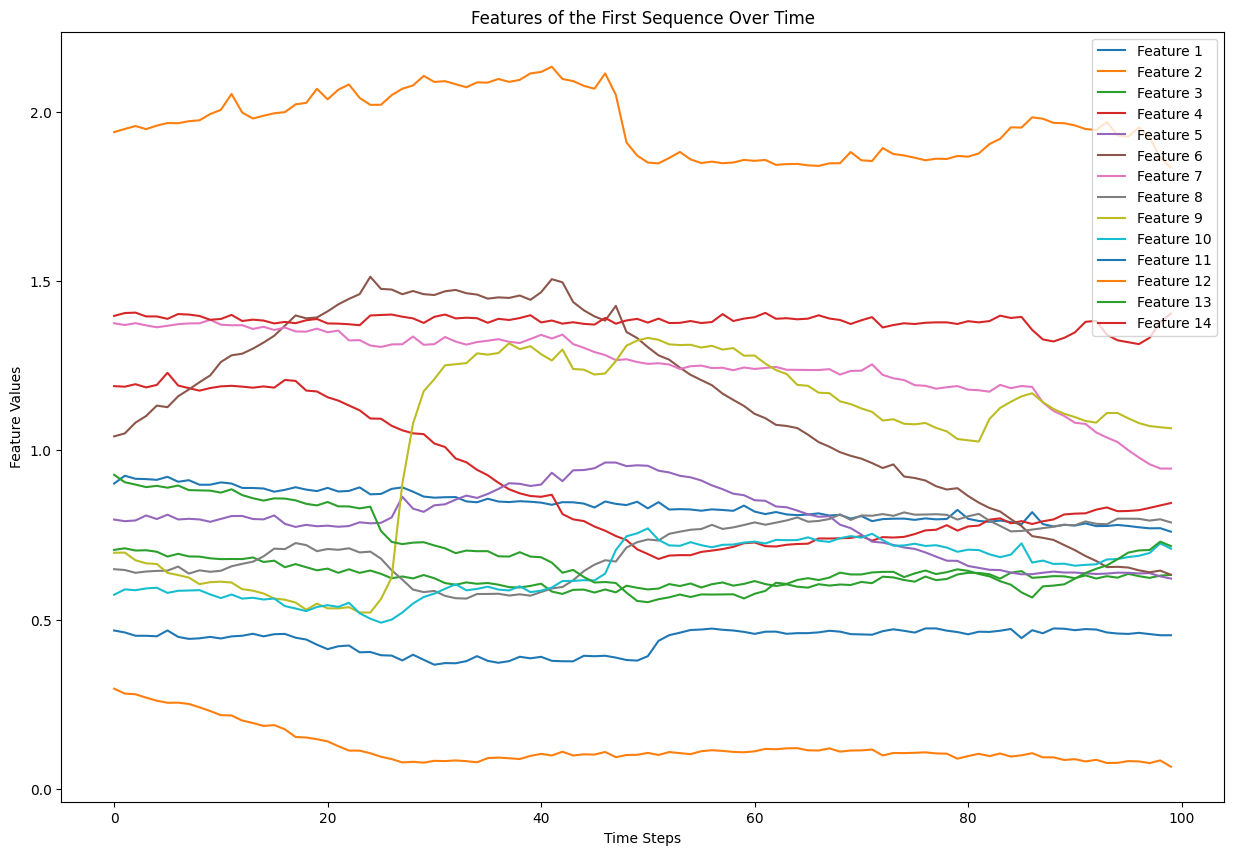

In [12]:
sequence = imputation[31]

# 绘制所有特征
plt.figure(figsize=(15, 10))
for i in range(sequence.shape[1]):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.title('Features of the First Sequence Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()

# reshape and transpose

reshape只能对第一维做

In [28]:
import numpy as np

arr = np.asarray([[1,10,100,1000,10000],[2,20,200,2000,20000],[3,30,300,3000,30000]])
arr = np.tile(arr,(4,1,1))

print(arr.shape)
print(arr)

(4, 3, 5)
[[[    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]]

 [[    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]]

 [[    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]]

 [[    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]]]


In [25]:
transpose_arr = arr.transpose(1,0,2)
print(transpose_arr.shape)
print(transpose_arr)
print('----------------------------------------------------')

reshape_arr = arr.reshape(3,4,5)

print(reshape_arr.shape)
print(reshape_arr)

(3, 4, 5)
[[[    1    10   100  1000 10000]
  [    1    10   100  1000 10000]
  [    1    10   100  1000 10000]
  [    1    10   100  1000 10000]]

 [[    2    20   200  2000 20000]
  [    2    20   200  2000 20000]
  [    2    20   200  2000 20000]
  [    2    20   200  2000 20000]]

 [[    3    30   300  3000 30000]
  [    3    30   300  3000 30000]
  [    3    30   300  3000 30000]
  [    3    30   300  3000 30000]]]
----------------------------------------------------
(3, 4, 5)
[[[    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]
  [    1    10   100  1000 10000]]

 [[    2    20   200  2000 20000]
  [    3    30   300  3000 30000]
  [    1    10   100  1000 10000]
  [    2    20   200  2000 20000]]

 [[    3    30   300  3000 30000]
  [    1    10   100  1000 10000]
  [    2    20   200  2000 20000]
  [    3    30   300  3000 30000]]]


In [26]:
batch_end_arr = arr.transpose(1,2,0)
print(batch_end_arr.shape)
print(batch_end_arr)
print('----------------------------------------------------')

reshape_arr = arr.reshape(3,5,2,2)
print(reshape_arr.shape)
print(reshape_arr)


(3, 5, 4)
[[[    1     1     1     1]
  [   10    10    10    10]
  [  100   100   100   100]
  [ 1000  1000  1000  1000]
  [10000 10000 10000 10000]]

 [[    2     2     2     2]
  [   20    20    20    20]
  [  200   200   200   200]
  [ 2000  2000  2000  2000]
  [20000 20000 20000 20000]]

 [[    3     3     3     3]
  [   30    30    30    30]
  [  300   300   300   300]
  [ 3000  3000  3000  3000]
  [30000 30000 30000 30000]]]
----------------------------------------------------
(3, 5, 2, 2)
[[[[    1    10]
   [  100  1000]]

  [[10000     2]
   [   20   200]]

  [[ 2000 20000]
   [    3    30]]

  [[  300  3000]
   [30000     1]]

  [[   10   100]
   [ 1000 10000]]]


 [[[    2    20]
   [  200  2000]]

  [[20000     3]
   [   30   300]]

  [[ 3000 30000]
   [    1    10]]

  [[  100  1000]
   [10000     2]]

  [[   20   200]
   [ 2000 20000]]]


 [[[    3    30]
   [  300  3000]]

  [[30000     1]
   [   10   100]]

  [[ 1000 10000]
   [    2    20]]

  [[  200  2000]
   [20000

In [34]:
reshape_first_arr = arr.reshape(2,2,3,5)
print(reshape_first_arr.shape)
print(reshape_first_arr)

print('----------------------------------------------------')
transpose_last_arr = reshape_first_arr.transpose(2,3,0,1)
print(transpose_last_arr.shape)
print(transpose_last_arr)

(2, 2, 3, 5)
[[[[    1    10   100  1000 10000]
   [    2    20   200  2000 20000]
   [    3    30   300  3000 30000]]

  [[    1    10   100  1000 10000]
   [    2    20   200  2000 20000]
   [    3    30   300  3000 30000]]]


 [[[    1    10   100  1000 10000]
   [    2    20   200  2000 20000]
   [    3    30   300  3000 30000]]

  [[    1    10   100  1000 10000]
   [    2    20   200  2000 20000]
   [    3    30   300  3000 30000]]]]
----------------------------------------------------
(3, 5, 2, 2)
[[[[    1     1]
   [    1     1]]

  [[   10    10]
   [   10    10]]

  [[  100   100]
   [  100   100]]

  [[ 1000  1000]
   [ 1000  1000]]

  [[10000 10000]
   [10000 10000]]]


 [[[    2     2]
   [    2     2]]

  [[   20    20]
   [   20    20]]

  [[  200   200]
   [  200   200]]

  [[ 2000  2000]
   [ 2000  2000]]

  [[20000 20000]
   [20000 20000]]]


 [[[    3     3]
   [    3     3]]

  [[   30    30]
   [   30    30]]

  [[  300   300]
   [  300   300]]

  [[ 3000  3000]
 

# sin函数

In [60]:
import numpy as np

# Define the sampling points and frequencies
num_points = 100
frequency = [1,3,10]  # Frequency of the first sine wave
for i in range(1997):
    frequency.append(1)

# Generate the sampling points for both sine waves
x = np.linspace(0, 2 * np.pi, num_points)
sin_wave = []
for i in range(len(frequency)):
    sin_wave.append(np.sin(frequency[i] * x))

# Combine both sine waves into a single array
sin_wave_arr = np.asarray(sin_wave).transpose(1,0)

sin_wave_arr = np.tile(sin_wave_arr,(300,1,1))


print(sin_wave_arr.shape)  # (300, 100, 3)

(300, 100, 2000)


In [66]:
test_arr = np.load('/mnt/sdb/hanyuji-data/SSSD_results/wot_result/sin_test_VAE_generate.npy')
test_arr = test_arr.transpose(1,0,2)
test_arr.shape

(300, 100, 2000)

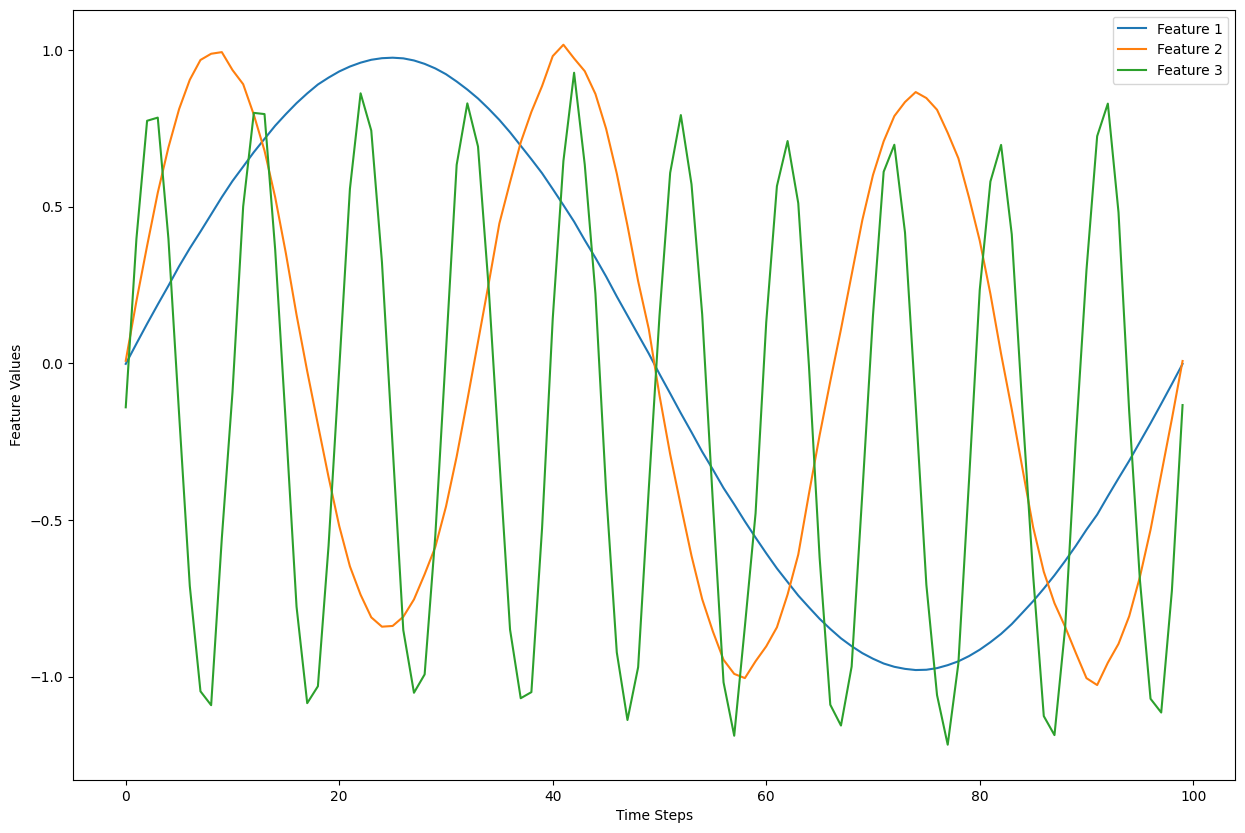

In [67]:
from matplotlib import pyplot as plt

sequence = test_arr[0]

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# 绘制所有特征
plt.figure(figsize=(15, 10))

for i in range(3):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()